# Trabalho de casa 01: Método dos vizinhos mais próximos ($k$-NN)

**Instruções gerais:** Sua submissão deve conter: 
1. Um "ipynb" com seu código e as soluções dos problemas
2. Uma versão pdf do ipynb

Caso você opte por resolver as questões de "papel e caneta" um editor de $\LaTeX$ externo, o inclua no final da versão pdf do 'ipynb'.

## Exercícios computacionais

**Exercício 1.** O código abaixo carrega o dataset MNIST, que consiste em imagens de dígitos entre $0$ e $9$. Teste o $k$-NN com distância euclidiana para classificação do conjunto de teste. Use valores de $k$ diferentes (e.g., de 1 a 5) e reporte a acurácia para cada valor de $k$. Lembre que a acurácia é o percentual de amostras classificadas corretamente. Notavelmente, as entradas do MNIST tem dimensão relativamente alta (64). Plote uma imagem com a variância amostral dos pixels das imagens e comente. Também mostre as imagens classificadas de maneira errônea e comente.

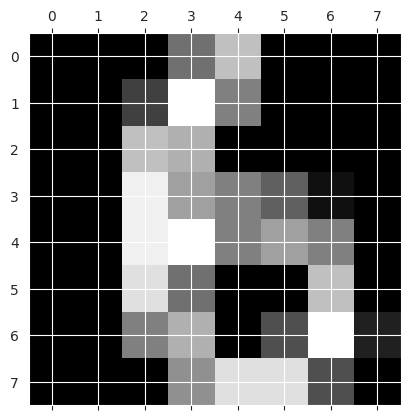

In [1]:
from dataclasses import dataclass

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_digits, make_moons
from sklearn.model_selection import train_test_split


SEED = 42
np.random.seed(SEED)

@dataclass
class Dataset:
    features_train: np.ndarray 
    features_test: np.ndarray  
    labels_train: np.ndarray   
    labels_test: np.ndarray

# Import dataset and separate train/test subsets
mnist = Dataset(*train_test_split(
    *load_digits(return_X_y=True),
    random_state=SEED,
))

# Notice that, in the MNIST dataset, the images are already flattened, i.e., are
# represented as 64-dimensional vectors, not as 8 by 8 matrices.

# To plot one of them, you should reshape it back into (8, 8)
plt.matshow(mnist.features_test[0].reshape(8, 8))
plt.gray()
plt.show()

In [2]:
def euclid_dist (a, b):
    return np.sqrt(np.sum((a - b)**2))

class KNN:
    def __init__(self, k, dist_fn):
        self.k = k
        self.dist_fn = dist_fn

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)

    def _predict(self, x):
        distances = [self.dist_fn(x, x_train) for x_train in self.X]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

Accuracy for k=1: 0.98
Accuracy for k=3: 0.99
Accuracy for k=5: 0.99
Accuracy for k=7: 0.99
Accuracy for k=9: 0.99
Accuracy for k=11: 0.98
Accuracy for k=13: 0.98
Accuracy for k=15: 0.98
Accuracy for k=17: 0.98


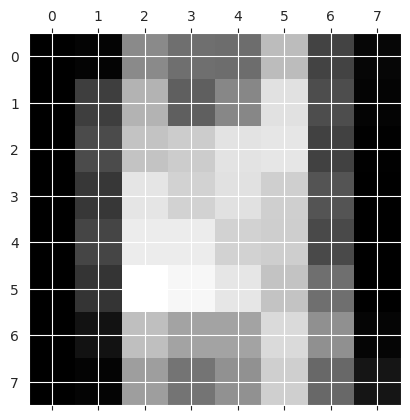

In [3]:
model = KNN(0, euclid_dist)
model.fit(mnist.features_train, mnist.labels_train)

for k in range(9):
    model.k = k*2+1
    predictionimg= model.predict(mnist.features_test)
    accuracy = np.mean(predictionimg == mnist.labels_test)
    print(f"Accuracy for k={k*2+1}: {accuracy:.2f}")
plt.matshow(np.var(mnist.features_train, axis=0).reshape(8, 8))
plt.show()

A variância amostral dos pixels das imagens é uma medida da dispersão dos valores dos pixels. Como podemos ver na imagem acima, a variância é quase nula nos pixels que estão mais próximos das bordas laterais da imagem. Isso ocorre porque os números estão concentrados no centros das imagens.


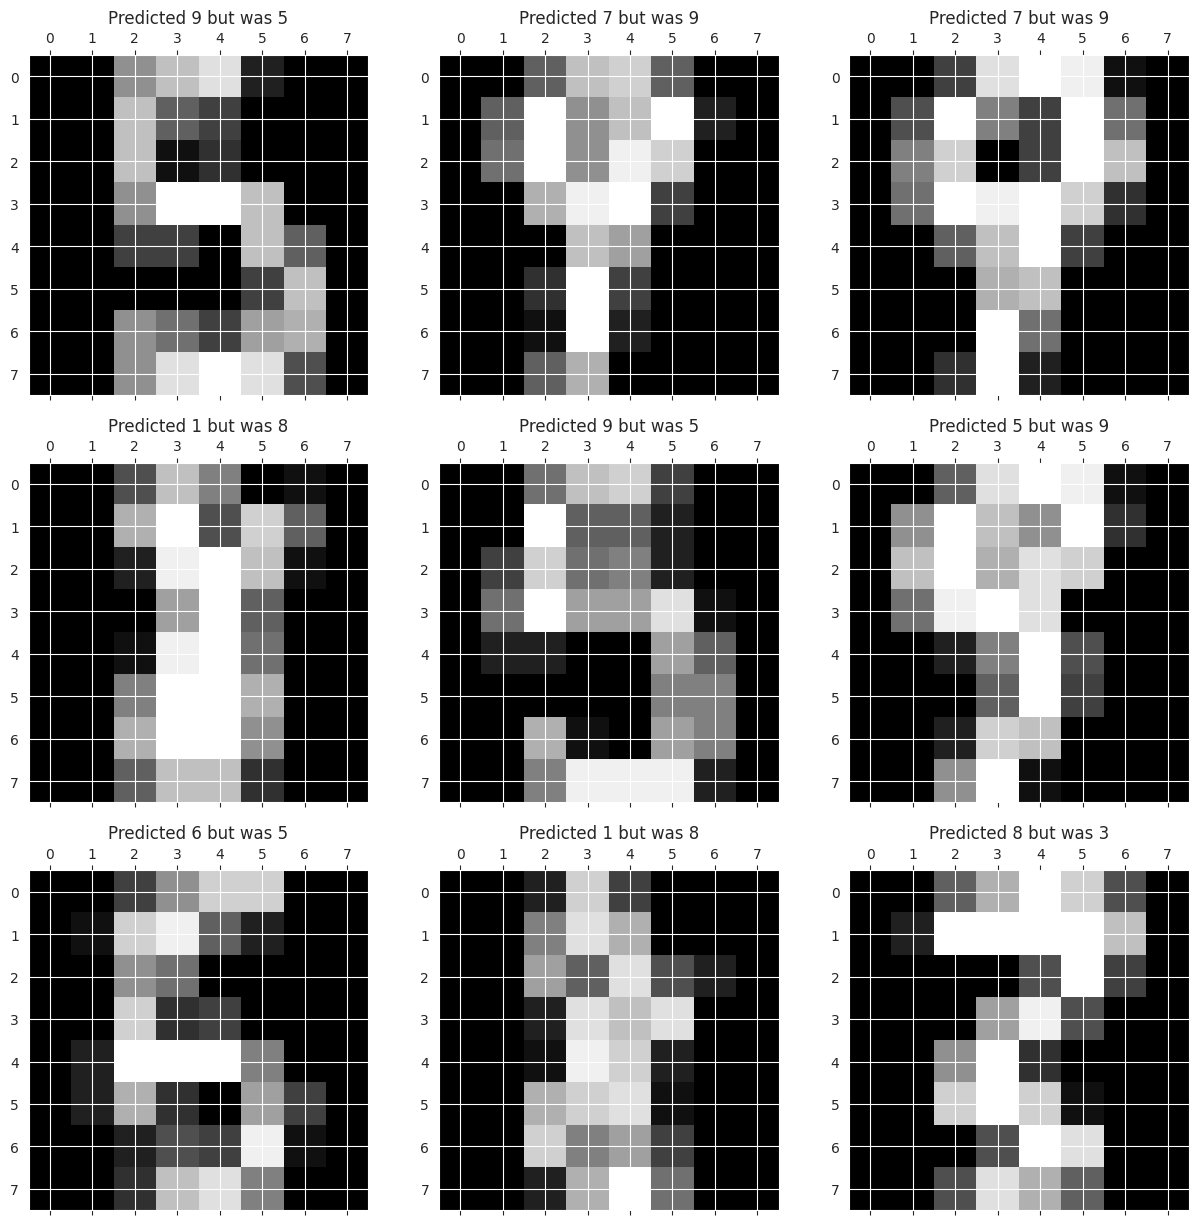

In [5]:
j=0

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
for i in range(len(predictionimg)):
    if predictionimg[i] != mnist.labels_test[i]:
        axs[j//3, j%3].matshow(mnist.features_test[i].reshape(8, 8))
        axs[j//3, j%3].set_title(f"Predicted {predictionimg[i]} but was {mnist.labels_test[i]}")
        j+=1
plt.show()

Plotando as imagens que foram classificadas erroneamente, podemos observar que a maioria dos erros ocorre em caso ambíguos, onde existe um ou mais píxel que conecta o traço do número de forma a possibilitar a classificação errônea.

**Exercício 02.** O código abaixo carrega o dataset "two moons", que consiste de amostras bidimensionais divididas em duas classes. Teste o $k$-NN com distância euclidiana para classificação do conjunto de teste. Use valores de $k$ diferentes (e.g., de 1 a 10). Plote a superfície de decisão para cada valor de $k$. Como $k$ influencia na suavidade dessas superfícies?

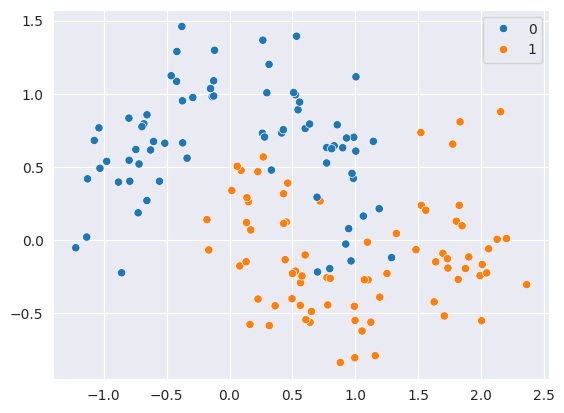

In [6]:
# Import dataset and separate train/test subsets
moon = Dataset(*train_test_split(
    *make_moons(n_samples=200, shuffle=True, noise=0.25, random_state=SEED),
    random_state=SEED,
))

# Let's also plot the moon dataset, for you to take a look at it.
sns.scatterplot(
    x=moon.features_train[:, 0],
    y=moon.features_train[:, 1],
    hue=moon.labels_train,
)
plt.show()

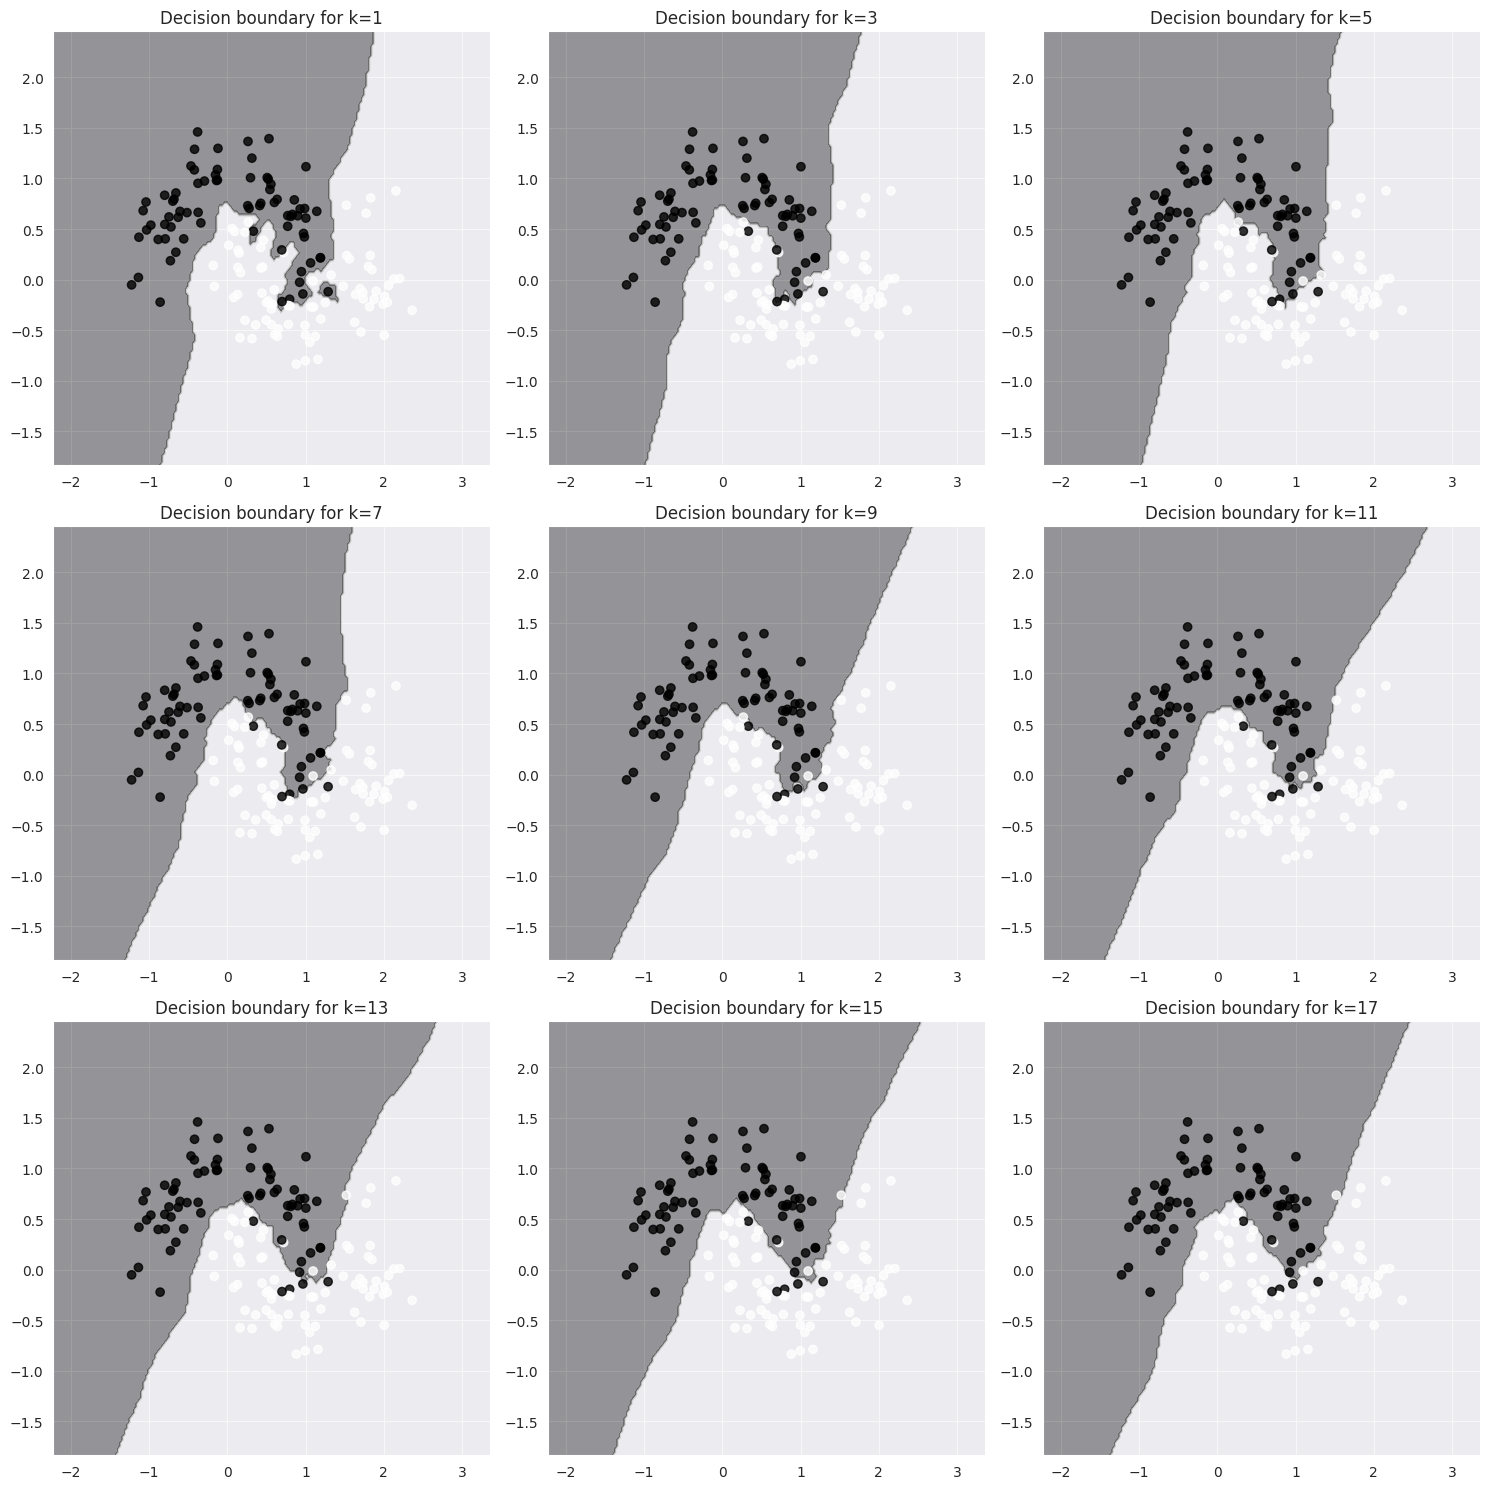

In [7]:
def plot_decision_boundary(X, y):
    h = 0.03
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    fig, axs = plt.subplots(3, 3, figsize=(15, 15))
    
    for k in range(9):
        model = KNN(k*2+1, euclid_dist)
        model.fit(X, y)
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        axs[k//3, k%3].contourf(xx, yy, Z, alpha=0.4)
        axs[k//3, k%3].scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
        axs[k//3, k%3].set_title(f"Decision boundary for k={k*2+1}")
    plt.tight_layout()
    plt.show()

plot_decision_boundary(moon.features_train, moon.labels_train)


Plotando as superfícies de decisão para diferentes valores de $k$, podemos observar que a suavidade da superfície aumenta com o valor de $k$. Com k menores, a superfície de decisão é mais irregular. Isso ocorre porque, com $k$ pequeno, o algoritmo é mais sensível a ruídos e outliers.


# Exercícios de "papel e caneta"

**Exercício 1.** Como mencionado na nota de aula, é comum *normalizar* os dados antes de utilizar algoritmos de ML. Seja $\mathbf{x} \in \mathcal{X}$ um ponto arbitrário do nosso conjunto de dados (antes de normalização). Deixe também que $\mathcal{V}_k(\mathbf{x})$ seja o conjunto dos $k$ vizinhos mais próximos de $\mathbf{x}$ dentre nossas observações. É possível que $\mathcal{V}_k(\mathbf{x})$ mude caso normalizemos os dados? Prove.

*Solução aqui ou em PDF anexo*

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model = KNN(1, lambda x,y: np.linalg.norm(x-y,-np.inf))
scaler.fit(np.concatenate((moon.features_train,moon.features_test), axis=0))
model.fit(scaler.transform(moon.features_train), moon.labels_train)
prediction_standard= model.predict(scaler.transform(moon.features_test))
model.fit(moon.features_train, moon.labels_train)
prediction= model.predict(moon.features_test)
[print("changed ",i) for i in range(len(prediction)) if prediction[i] != prediction_standard[i]]

changed  9
changed  31
changed  37
changed  38


[None, None, None, None]

Como podemos ver no exercício acima, a normalização dos dados altera a classificação de algumas amostras, o que implica que o conjunto de vizinhos mais próximos também é alterado. Isso é um resultado esperado, visto que a como cada eixo pode ter uma variância diferente, cada eixo pode ser multiplicado por um número diferente, o que pode alterar a ordem de distância entre os pontos.

**Exercício 2.** Suponha que estamos usando $k$-NN equipado com distância Mahalanobis $d_M$ (veja Eq. 3.5 das notas de aula). Suponha ainda que $\Sigma$ é a matrix de covariância real dos dados (i.e., do vetor aleatório $\mathbf{x} \sim \mathbb{P}_\mathbf{x}$), ao invés de uma estimativa baseada em amostras. Existe uma transformação $g$ tal que $d_M(a, b) = \|g(a) - g(b) \|_2$? Mostre a transformação e derive a matriz de covariância de $z = g(\mathbf{x})$. 

norma de Mahanlanobis: $d_M(a,b) = \sqrt{(a-b)^T\Sigma^{-1} (a-b)}$<br>
Toda matriz de covariância é semipositiva definida, particularmente, toda matriz de covariância invertível é positiva definida, o que implica que a sua inversa também é positiva definida, e portanto, é possível encontrar uma matriz $L$ tal que $\Sigma^{-1} = L^TL$ usando a decomposição de Cholesky:\
$d_M(a,b) = \sqrt{(a-b)^TL^TL (a-b)}$\
$d_M(a,b) = \sqrt{(L(a-b))^TL(a-b)}$\
Usando $g(a)=La$, temos:\
$d_M(a,b) = \sqrt{(g(a)-g(b))^T (g(a)-g(b))} = \|g(a) - g(b) \|_2$\
$z = g(\mathbf{x}) = L\mathbf{x}$\
$Cov(z) = Cov(L\mathbf{x}) = LCov(\mathbf{x})L^T = L(L^TL)^{-1}L^T = (LL^{-1})(LL^{-1})^T = I$\
A matriz de covariância de $z$ é a matriz identidade.